# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
x_test = pd.read_csv('x_test_balanced.csv', delimiter = ',')
x_train = pd.read_csv('x_train_balanced.csv', delimiter = ',')
y_test = pd.read_csv('y_test_balanced.csv', delimiter = ',')
y_train = pd.read_csv('y_train_balanced.csv', delimiter = ',')

In [4]:
x_test

,Age,Income,Number of Children,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,55000.0,0,0,1,1,True,False,False,False
1,48.0,87500.0,1,0,0,0,False,True,False,False
2,26.0,55000.0,1,0,0,0,True,False,False,False
3,39.0,62500.0,2,0,0,0,True,False,False,False
4,35.0,90000.0,1,0,0,0,False,True,False,False
5,25.0,55000.0,0,0,1,1,True,False,False,False
6,48.0,82500.0,1,0,0,0,False,True,False,False
7,48.0,82500.0,1,0,0,0,False,True,False,False
8,36.0,95000.0,2,0,0,0,False,False,False,True
9,36.0,95000.0,1,0,0,0,False,False,True,False


In [5]:
x_train

,Age,Income,Number of Children,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,45000.000000,0,0,1,1,False,False,False,False
1,29.000000,27500.000000,0,0,1,1,False,False,True,False
2,25.000000,62500.000000,0,0,1,1,True,False,False,False
3,29.000000,68000.000000,2,0,0,0,False,True,False,False
4,31.000000,65000.000000,0,1,1,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
247,29.950365,43703.466973,0,0,1,1,False,False,False,False
248,34.000000,47500.000000,0,1,1,1,False,False,False,False
249,29.702951,57500.000000,0,0,1,1,True,False,False,False
250,25.000000,60063.547817,0,0,1,1,True,False,False,False


In [6]:
y_test

,Credit_Score_encoded
0,1.0
1,2.0
2,1.0
3,2.0
4,2.0
5,1.0
6,2.0
7,2.0
8,2.0
9,2.0


In [7]:
y_train

,Credit_Score_encoded
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
247,1.0
248,1.0
249,1.0
250,1.0


In [8]:
contagem_classes = y_train.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Credit_Score_encoded
0.0                     84
1.0                     84
2.0                     84
Name: count, dtype: int64


In [29]:
contagem_classes = y_test.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Credit_Score_encoded
2.0                     29
0.0                      6
1.0                      6
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

O processo para aplicação do algoritmo da árvore de decisão tem início na etapa de preparação e tratamento dos dados, nela é efetuada a limpeza dos dados, tratamento de dados nulos e outliers, padronização, criação de novas variáveis, entre outras ações. 

Após isso é realizada a análise exploratória dos dados (AED), onde primeiro é feita a análise univariada das variáveis numéricas e, posteriormente, a análise bivariada, envolvendo as variáveis categóricas. Nessa etapa são utilizados gráficos para realizar a exploração pelos dados, como gráficos de barras, histograma, dispersão, pizza e heatmap. A AED é importante, pois através dela é possível identificar quais variáveis apresentam maior ou menor relação entre si.

Por fim, os dados são divididos em bases de treino e teste, utilizando a proporção de 75% para treino e 25% para teste, e o modelo algoritmo escolhido é treinado utilizando a base de treino. Após a etapa de treino é realizada os testes para avaliação do modelo utilizando métricas como *Precision*, *Recall*, *F1-Score* e *Acurácia*, por meio dessas métricas é possível validar o desempenho do modelo, conferindo se ele está enviesado ou com *overfitting*.  

Posteriormente a etapa de avaliação do modelo, pode ser necessário a realização de ações para melhoramento, como a poda da árvore e uma maior personalização dos parâmetros do algoritmo da árvore de descisão. Contudo, é importante conferir se as váriáveis presentes na base de dados são boas para o tipo de modelo escolhido, sendo essencial escolher as melhores e mais relevantes features. 

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [9]:
arvore_score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
previsoes = arvore_score.predict(x_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [28]:
relatorio = classification_report(y_train, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        84
         1.0       1.00      1.00      1.00        84
         2.0       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [13]:
previsoes_test = arvore_score.predict(x_test)
acuracia_test = accuracy_score(y_test, previsoes_test)
print("Acurácia:", acuracia_test)

Acurácia: 0.975609756097561


In [14]:
relatorio = classification_report(y_test, previsoes_test)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



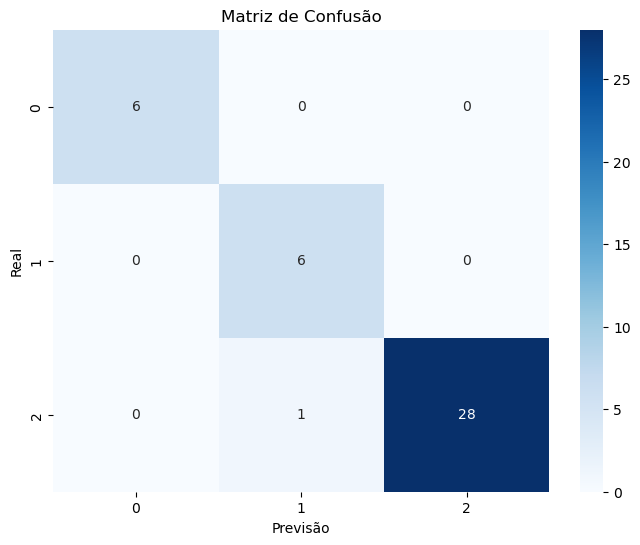

In [15]:
matriz_confusao = confusion_matrix(y_test, previsoes_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Na base de treino, o modelo conseguiu predizer corretamente todos os elementos da variável target, alcançando acurácia de **1.0**. Já na base de teste a acurácia alcançada foi **0.97**. Houve uma ligeira diferença entre as duas bases, mas ambas performaram bem.   

Em relação à métrica de **recall**, o modelo obteve valor de de **1.0** para os score *low* e *average*, e **0.97** para o score *high*. Esses valores significam que dentre todos os positivos reais a árvore de decisão conseguiu prever todos os casos nas classes *low* e *average*, e 97% dos casos da classe *high*.  

A métrica **precision** que havalia se os positivos apontados pelo modelo conrrespondem com os positivos reais. Nessa métrica temos o valor de **1.0** para os score *low* e *high*, e **0.86** para o score *average*. Logo, esse resultado indica que o modelo apresentou maior dificuldade em prever corretamente os elementos do score *average*.   

É possível acompanhar de forma mais visual essas métricas na Matriz de Confusão.  

Por fim, o resultado de **f1-score** mostra que o modelo apresenta um bom equilíbrio entre recall e precision, com valores próximos entre as classes da variável target. Sendo de **1.0** para *low*, **0.92** para *average* e **0.98** para *high*.  

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

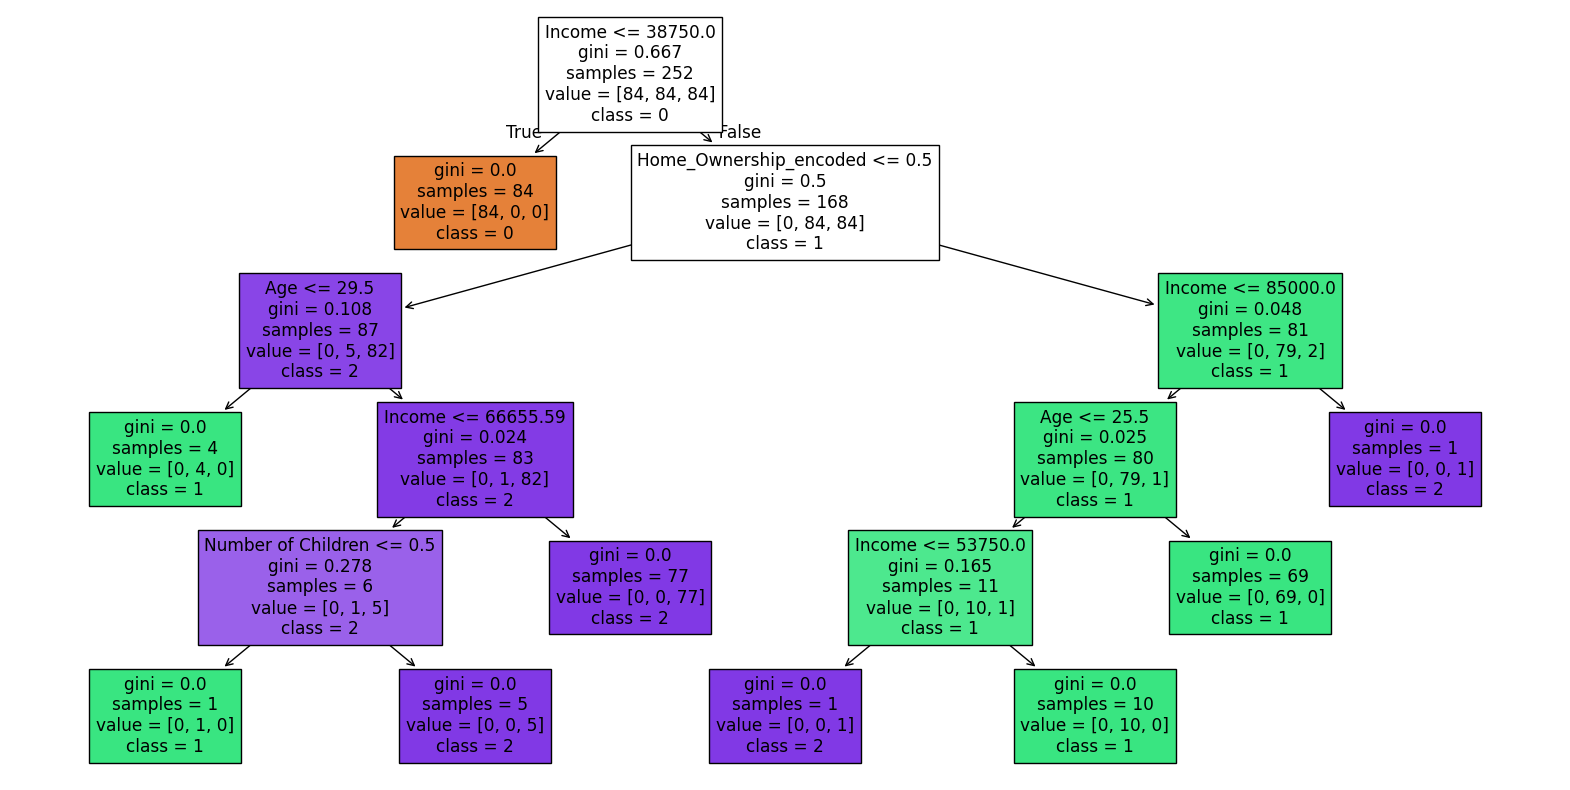

In [17]:
plt.figure(figsize=(20,10))
plot_tree(arvore_score, filled=True, feature_names=x_train.columns, class_names=['0', '1', '2'])
plt.show()

A feature de maior importância, utilizada como raiz da árvore de decisão, foi *Income*, sendo seguidas pelas variáveis *Home_Ownership_encoded*, *Age* e *Number of Children*. Esse comportamento indica que a renda anual é o principal fator discriminante para a previsão do score de crédito, influenciando diretamente as primeiras decisões do modelo.  

A árvore de decisão possuí 5 níveis de profundidade, considerando a raiz, ela realiza 5 divisões ao longo de sua estrutura. 

# 6) Identifique as 2 principais features do modelo.


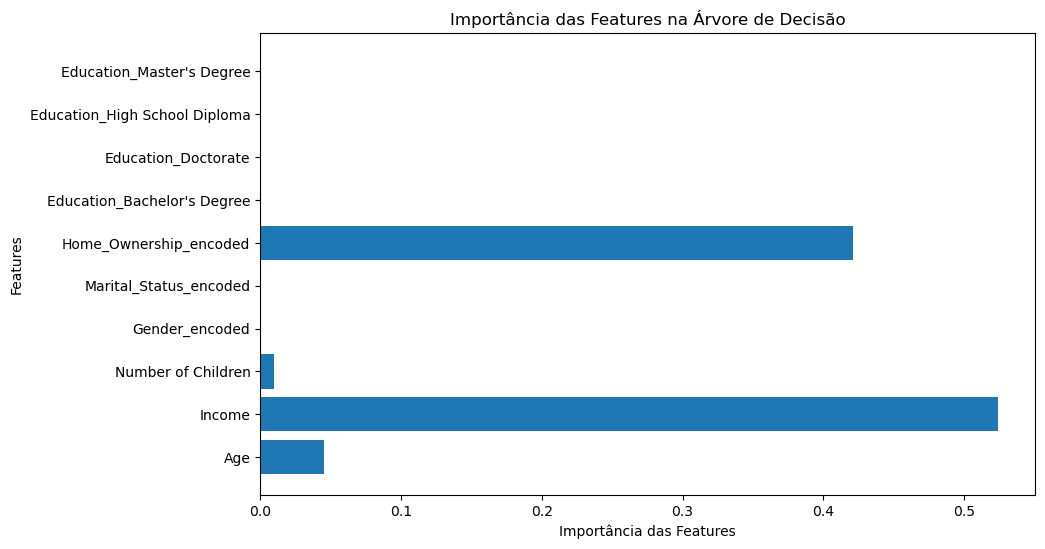

In [18]:
features_importantes = arvore_score.feature_importances_

nomes_features = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, features_importantes)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [20]:
x_train_reduzido = x_train[['Home_Ownership_encoded', 'Income']]
x_test_reduzido = x_test[['Home_Ownership_encoded', 'Income']]

In [22]:
arvore_score_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score_reduzido.fit(x_train_reduzido, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
previsoes_reduzido = arvore_score_reduzido.predict(x_test_reduzido)
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.83      0.83      0.83         6
         2.0       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



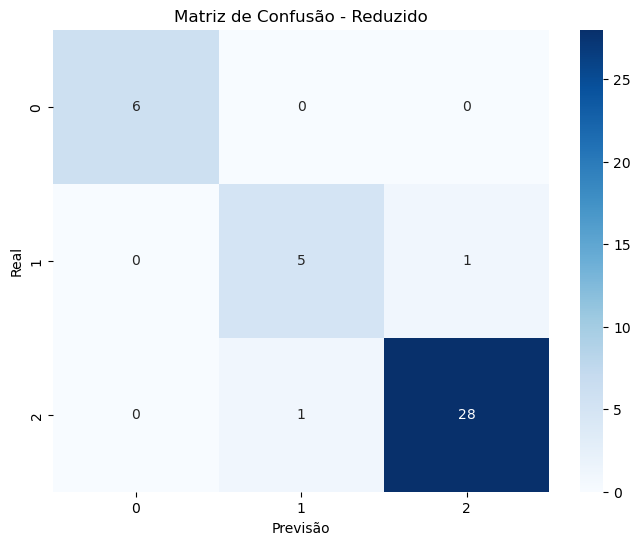

In [25]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Reduzido')
plt.show()

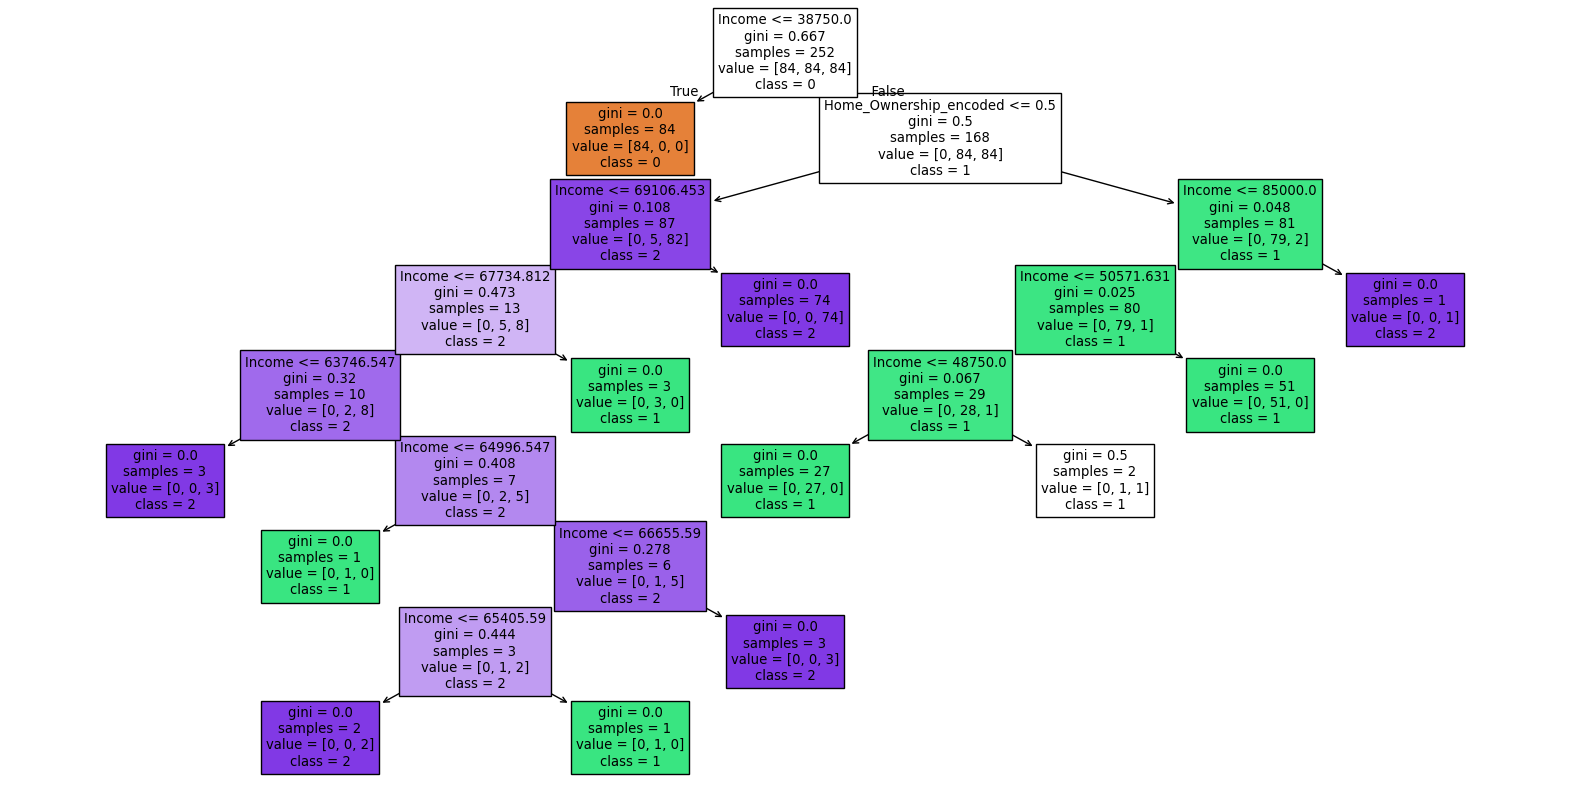

In [26]:
plt.figure(figsize=(20,10))
plot_tree(arvore_score_reduzido, filled=True, feature_names=x_train_reduzido.columns, class_names=['0', '1', '2'])
plt.show()

O modelo treinado utilizando apenas duas features apresentou desempenho inferior se comparado ao modelo anterior. As métricas de **acurácia**, **recall**, **precision** e **f1-score** apresentaram desempenho ligeiramente inferior se comparadas ao outro modelo.  

A classe *average* da variável target foi a mais afetada, apresentando resultado de *0.83* em todas as métricas. Sendo assim, o modelo segue apresentando dificuldades em prever corretamente essa classe.  

Em relação a estrutura da árvore de decisão, observa-se um aumento no número de níveis de profundidade. Isso pode indicar uma maior complexidade do modelo. 

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Com o modelo de **Naive Bayes** obtivemos valores de **acurácia** e **recall** iguais a **1.0**, já com o modelo baseado no algoritmo da **árvore de decisão** conseguimos alcançar valores iguais ou muito próximos a 1.0 ao analisarmos as métricas de desempenho.  

Ambos os modelos apresentaram um bom desempenho com as bases de teste, contudo, o modelo de árvore de decisão possui maior potencial para alcançar um desempenho superior quando aplicado a uma base de dados maior.